# **¿Qué haríamos sin ellos en el presente y futuro?**

*"Evolución de Infusiones y otros productos en el mercado interno argentino"*

# **Índice**

1. Datos Generales
2. Datasets
3. Definición de temática
4. Elección de Dataset para evaluación
5. Análisis Exploratorio de Datos (EDA)
6. Análisis de Series Temporales
7. Pronóstico de series temporales
8. Limpieza de dataset
9. Obtención de Insights




# **1. Datos Generales**

Todo comenzó con una propiedad ganadera llamada Vuelta del Ombú, Departamento de Santo Tomé - Corrientes. La familia y sus descendientes desafiaron las tradiciones de la región y realizaron las primeras plantaciones de yerba mate. Posteriormente, se avanzó con la industrialización del producto elaborado con una marca que se posiciono en un mercado muy competitivo y de un producto de consumo primario. Desde principio de Siglo XX hasta la actualidad, la familia amplia el negocio a otros productos como el té, derivados de la yerba mate, ganadería, forestaciones (plantación de eucaliptus y pino) y otros rubros. Ya en el siglo XXI la empresa realiza convenios con varias empresas internacionales para comenzar a ser distribuidora nacional de sus productos, con lo cual además de productos nacionales de primera necesidad comienza la comercialización de otros productos. Actualmente, su cuarta generación se distingue por la elaboración integral de yerba mate y té de calidad internacional, apoyando a su comunidad y cuidando el entorno natural en que se desarrolla, apostando al crecimiento de la economía regional.


***a- ¿Qué es la Yerba Mate?***
La yerba mate, yerba de los jesuitas o yerba del Paraguay (en guaraní: ka'a), es una especie arbórea neotropical originaria de América del Sur presente en la región de Argentina, Paraguay y Brasil, así como también en las sierras boscosas de Uruguay en donde crece en estado silvestre. De las hojas y ramas, secas y molidas se prepara el mate, una infusión originaria de su zona de crecimiento natural y común en la gastronomía de Paraguay, el Sur de Brasil, Argentina, sur y, Uruguay y ciertas regiones del sur de Chile.
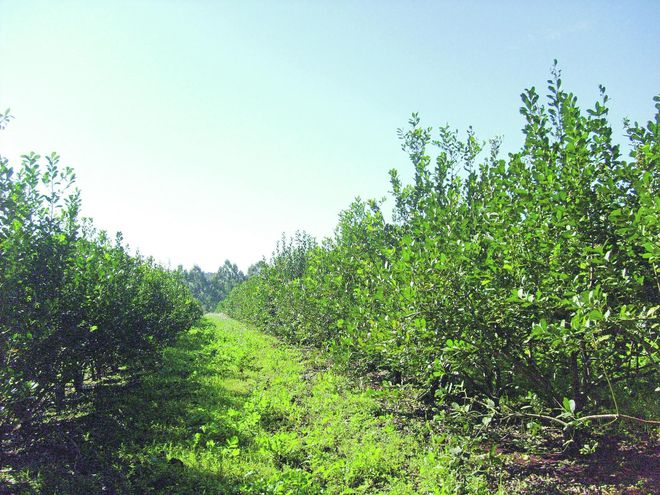



***b- ¿Qué es el té?***
El té es la infusión de las hojas y brotes de la planta del té (Camellia sinensis). La popularidad de esta bebida es solamente sobrepasada por el agua. Su sabor es fresco, ligeramente amargo y astringente; este gusto es agradable para mucha gente. El té proviene principalmente de China continental, India, Sri Lanka, Taiwán, Japón, Nepal, Australia, Argentina y Kenia. La planta de té se adapta mejor en climas tropicales y subtropicales, además necesita de lluvia aproximadamente 1250 mm por año. Las hojas del arbusto Camellia sinensis, si no son secadas apenas se recolectan, comienzan a oxidarse. Para prevenir este proceso de oxidación, se calientan con el objetivo de quitarles la humedad.

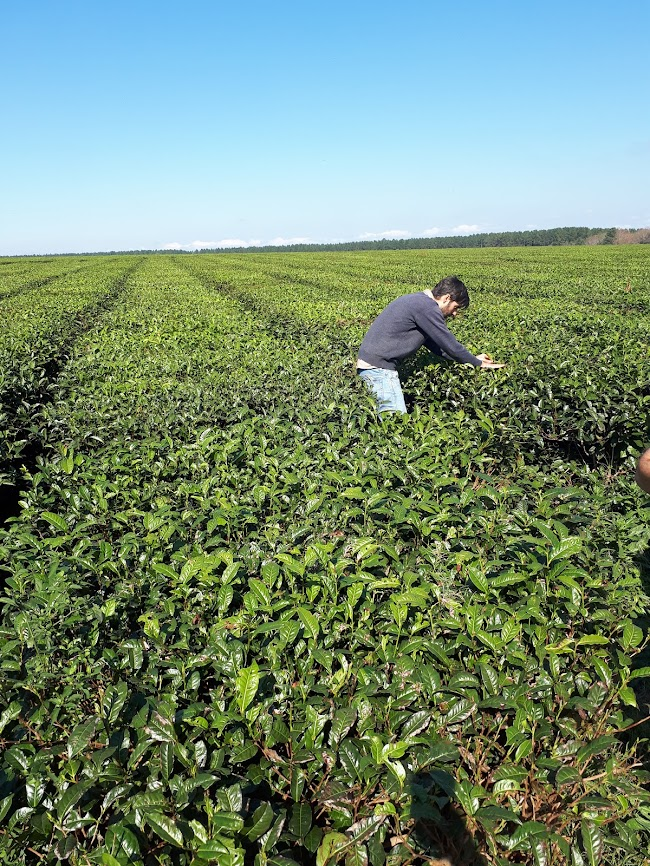


***c- Productos distribuidos***
La empresa negocia con marcas internacionales 3 tipos de productos, aquellos que son complementarios para sus productos principales (galletas, etc), productos que son de primera necesidad (arroz, pastas,etc) y productos para temporadas festivas.



# **2. Datasets**

Los datasets originales se encuentran en formato Excel, con datos agrupados de manera cerrada en Línea de Producto y Canal de Distribución, ambos con nombre genéricos, sin marcas y nombres de clientes, es importante destacar que la información también se encuentra a valores mensuales y por año.



# **3. Definición de temática**

El dataset tiene la información de los niveles de facturación y costos tanto en pesos como en kilos, por línea de productos y los canales de distribución por los cuales llega al mercado.

A partir de esta información se puede comenzar a determinar la relación de facturación, rendimientos, costos, línea y canal.



# ***3.1-Hipótesis***

La empresa posee rendimientos por la comercialización por tipo de producto y por canal de distribución. 

La empresa tenderá a especializarse en la venta de productos cuyos beneficios son altos.

La empresa desestimará los canales y productos cuyo rendimiento sea menor al 2%.


# ***3.2- Objetivos Principales***

A- Predecir que productos comercializados darán mayor beneficio a la empresa.
B- Predecir que canal de distribución hay que fortalecer para el crecimiento de ventas.
C- Predecir que productos serán desestimados en el tiempo por sus beneficios decrecientes.


# ***3.3- Objetivos Secundarios***

1- Determinar relación entre facturación y costos, 
2- Determinar relación entre facturación y kilos, 
3- Determinar los costos por línea y cadena de distribución, 
4- Analizar posbiles relaciones futuras entre las líneas de productos y los canales de distribución, 
5- Calcular rentabilidad por línea, 
6- Calcular rentabilidad por cadena de distribución, 
7- Determinar períodos de mayor facturación y la incidencia de cada canal.


# ***3.4- Usuarios finales:***

El alcance del presente es solamente en el ámbito del directorio y gerencias de la empresa, poniendo al alcance de la mano una herramienta diseñada especificamente para la toma futura de decisiones.


# ***3.5- Línea futura***

Este informe se puede ampliar con nuevos criterios de medida, se debe actualizar con nuevos datos y ampliar el espectro hacia otros rubros económicos desarrollados por la empresa para así tener un panorama más amplio de la actividad desarrollada.



# **4. Elección de Dataset para evaluación**

Como bien se detallo en los puntos anteriores, el dataset cuenta con datos relevantes como ingreso/costo por producto y cadena de distribución, por lo que se puede determinar la rentabilidad por cadena de distribución o por producto, conocer los kilos reales de productos comercializados. Este dataset contiene datos desde 2017 a agosto 2022 (última información disponible).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as mplt
import seaborn as sbn
import matplotlib.pylab as pltlab
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler




productos_por_CanalDistrib= '/content/1.Base Prod por Canal de Distrib - Silvana Tomsig- Alejandro Sebastian de Leon.csv'
df_ProdporCanal = pd.read_csv(productos_por_CanalDistrib,index_col=0, encoding='latin-1', sep=";")

En esta primera instancia, se importan todas las librerías estadísticas, gráficas y númericas, que serán utilizadas en el proceso de creación del proyecto.

Posteriormente, se carga el archivo csv con la información  base para el desarrollo de los análisis.

# **4.1. Facturación y kilos comercializados**

En este punto se mostrará la relación existente entre la facturación en pesos y en kilos, cuales han sido sus comportamientos a lo largo del período analizado (ene-2017 a jun-2022).


# **a- Facturación**

En este primer análisis se evalua el total facturado en pesos por año, lo que se busca lograr con este análisis es  determinar la pendiente de la función asociada, la cuál es:

`Fact Total = precio x cantidad`

partiendo del supuesto que ambas son positivas cómo lo marca la teoría económica.

In [ ]:
df_FactyCosto =pd.read_csv(productos_por_CanalDistrib,encoding='latin-1',sep=";")
df_FactyCosto.head()

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
0,YERBA MATE TRADICIONA,Yerba Mate,Canal Inexistente,2018,Febrero,49228,24533,940,940,0,0,0
1,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,2018,Abril,0,0,0,0,0,0,0
2,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,2018,Mayo,0,0,0,0,0,0,0
3,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,2018,Junio,0,0,0,0,0,0,0
4,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,2018,Julio,0,0,0,0,0,0,0


En este primer código, se genera un dataframe con la información.

In [ ]:
df_FactyCosto.index = df_FactyCosto['Anio']
df_FactyCosto = df_FactyCosto.drop('Anio', axis= 'columns')
df_FactyCosto

,Linea,Línea Unificada,Canal de distribución,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
Anio,,,,,,,,,,,
2018,YERBA MATE TRADICIONA,Yerba Mate,Canal Inexistente,Febrero,49228,24533,940,940,0,0,0
2018,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,Abril,0,0,0,0,0,0,0
2018,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,Mayo,0,0,0,0,0,0,0
2018,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,Junio,0,0,0,0,0,0,0
2018,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,Julio,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017,Mates,Equipo de mate,No Tradicionales / Especiales,Octubre,0,56,0,0,0,0,0
2017,Mates,Equipo de mate,Contaduria,Febrero,0,56,0,0,0,0,0
2017,Mates,Equipo de mate,Contaduria,Mayo,0,282,0,1,0,0,0


En esta segunda etapa se realiza el orden de columnas, solicitando al dataframe que la primer columna sea la de año.

In [ ]:
df_FactyCostosAcum= df_FactyCosto.groupby(df_FactyCosto.index).sum()

df_FactyCostosAcum

,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
Anio,,,,,,,
2017,4405379059,2373316762,103208037,100995250,304371,161782,2030330
2018,6131226605,3318412172,101477357,99842743,75347,136572,1916811
2019,11055450950,5195433191,107419605,105499647,276148,157412,1588294
2020,14300643365,7711290646,56954508,53648249,75392,50278,491747
2021,23429810476,12901477725,61651594,61034066,2102,74465,640140
2022,17940011717,8917005391,36229815,35061604,1052,27083,503145


Este código se le pide que agrupe o sume por año las variables que encuentre en el dataframe.

In [ ]:
df_Fact= df_FactyCostosAcum['Fac Impo Bruto']
df_Fact

Anio
2017     4405379059
2018     6131226605
2019    11055450950
2020    14300643365
2021    23429810476
2022    17940011717
Name: Fac Impo Bruto, dtype: int64

Este código se le solicita que genere un sub dataframe con la Facturación por año.

In [ ]:
x = df_Fact.index
y = df_Fact
y

Anio
2017     4405379059
2018     6131226605
2019    11055450950
2020    14300643365
2021    23429810476
2022    17940011717
Name: Fac Impo Bruto, dtype: int64

Se definen las variables para los ejes dimensionales.

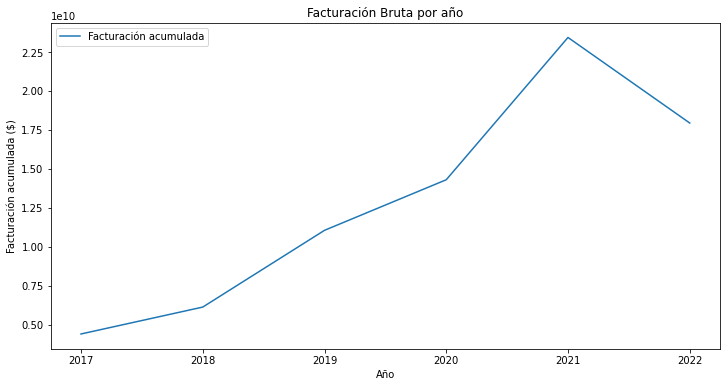

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, label='Facturación acumulada')
ax.set_xlabel('Año')                  
ax.set_ylabel('Facturación acumulada ($)')
ax.set_title('Facturación Bruta por año')
ax.legend()

***Conclusión a:***

En este primer gráfico se busca evaluar la evolución de la facturación en el tiempo, lo que evidencia visualmente es que el nivel de facturación en pesos ha mantenido una correlación positiva en el tiempo.

Es decir que ambas variables de la función de ingresos tienen relación positiva.

***b- Facturación en kilos***

En este segundo análisis, se busca conocer la evolución de la cantidad de kilos facturados por año.

En el apartado a) se pudo concluir que hay correlación positiva, ahora nos queda saber si los kilos facturados son los que contribuyen a esa correlación.

In [ ]:
df_KilosFacturados = df_FactyCosto[['Mes','Fac Kilos']]

data = df_FactyCostosAcum['Fac Kilos']

En el punto a- se generó un dataframe universal para luego dar pie a obtener sub datas que nos permitan comparar las variables desde distintas ópticas. 

A este código se le solicita que genere un sub dataframe con los Kilos Facturados.

In [ ]:
x= data.index
y =data
y

Anio
2017    103208037
2018    101477357
2019    107419605
2020     56954508
2021     61651594
2022     36229815
Name: Fac Kilos, dtype: int64

Se definen las variables para los ejes dimensionales.

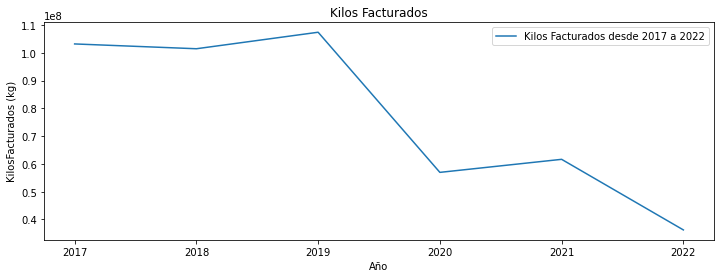

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Kilos Facturados desde 2017 a 2022')
ax.set_xlabel('Año')                  
ax.set_ylabel('KilosFacturados (kg)')
ax.set_title('Kilos Facturados')
ax.legend() 

***Conclusión b:***

En este gráfico se puede destacar que la evolución de los kilos facturados ha tenido un fuerte descenso en los años de referencia.

De acuerdo a la conclusión del primer punto, la correlación positiva es mayor vía precios, con lo cual ese incremento es de suponer mayor que el descenso de la cantidad facturada, para así lograr los ingresos positivos.

***c- Facturación en pesos versus kilos***

A partir de los dos análisis anteriores, surge la incognita de que tipo de relación existe entre el nivel de facturación en pesos y en kilos.

Text(0.5, 1.0, 'Relación entre Kilos facturados y Montos facturados')

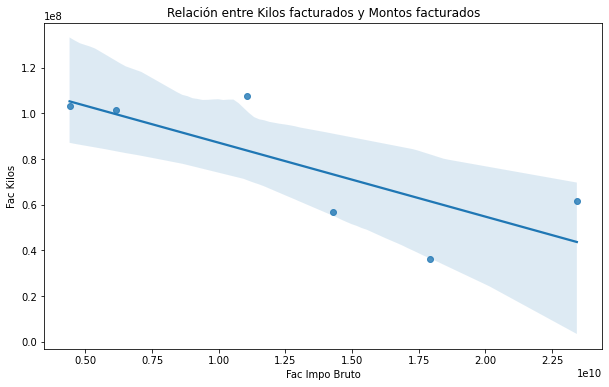

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_FactyCostosAcum, x='Fac Impo Bruto', y='Fac Kilos')
plt.title("Relación entre Kilos facturados y Montos facturados")

***Conclusión c:***


En el punto a se evidenció que la facturación en pesos como función de ingresos su pendiente es positiva, posteriormente se visualizó que los kilos facturados fueron disminuyendo con el paso de los años.

Al comparar ambas variables se puede interpretar que su correlación no es positiva, por lo que se puede deducir que existe otra variable que crece más que la disminución del volumen facturado, para así poder mantener la correlatividad positiva de la variable facturación.

***d- Kilos comercializados versus facturados***

Una vez analizada la relación entre las cantidades comercializadas en kilos y en pesos, nos resta verificar si las cantidades comercializadas y facturadas coinciden o tienen alguna diferencia.

Text(0.5, 1.0, 'Relación entre Kilos facturados y Kilos Comerciales')

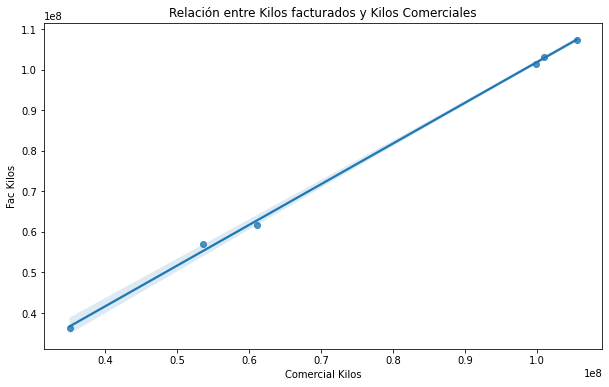

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_FactyCostosAcum, x='Comercial Kilos', y='Fac Kilos')
plt.title("Relación entre Kilos facturados y Kilos Comerciales")

***Conclusión d:***

Para este caso las variables de estudio muestran una relación directamente proporcional.

Visualmente se registra que entre ambas variables existe una diferencia, que puede deberse a diferentes razones (por ejemplo: merma o pérdidas). Será de estudio para futuro si las cantidades informadas por mermas o pérdidas son iguales a la diferencia existente este estas dos variables.

# **4.2. Facturación y Costos**


Para continuar con el análisis, se comprobará la relación que poseen las variables en pesos Facturación (Ingresos) vs los Costos Totales de Ventas.

En la teoría económica, el costo esta relacionado o es formador del precio de venta, por lo cual existe una directa relación entre ambas variables.

Text(0.5, 1.0, 'Relación entre Facturación y Costos de Ventas')

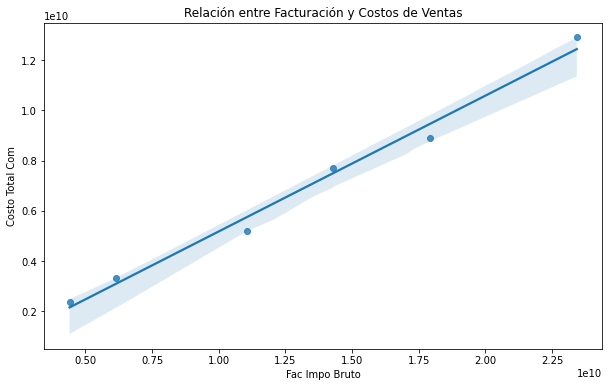

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_FactyCostosAcum, x='Fac Impo Bruto', y='Costo Total Com')
plt.title("Relación entre Facturación y Costos de Ventas")

***Conclusión:***

Al observar esta relación se evidencia cómo bien menciona la teoría, que ambas variables poseen una relación directamente proporcional, al aumentar una variable automáticamente la otra aumenta.

# **4.3- Canal de distribución**

Desglosando las variables, se puede evaluar la facturación y los costos tanto en pesos como en kilos por cada canal utilizado para la distribución de los distintos productos.

***a- Facturación por Canal***

Para comenzar este análisis se comenzará evaluando los canales de distribución por el nivel facturado para cada uno.

In [ ]:
df_CostoporCanal =pd.read_csv(productos_por_CanalDistrib,encoding='latin-1',sep=";")
df_CostoporCanal.head()

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
0,YERBA MATE TRADICIONA,Yerba Mate,Canal Inexistente,2018,Febrero,49228,24533,940,940,0,0,0
1,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,2018,Abril,0,0,0,0,0,0,0
2,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,2018,Mayo,0,0,0,0,0,0,0
3,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,2018,Junio,0,0,0,0,0,0,0
4,YERBA MATE TRADICIONAL,Yerba Mate,Canal Inexistente,2018,Julio,0,0,0,0,0,0,0


En este caso, se solicita que genere un dataframe con la información que brinda el dataset.

In [ ]:
df_CostoporCanalAcum = df_CostoporCanal.groupby(['Canal de distribución']).sum()
df_CostoporCanalAcum

,Anio,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
Canal de distribución,,,,,,,,
Cadenas de Supermercados,2126210,26979426765,14598158301,153745584,150562475,405894,221541,2296952
Canal Inexistente,212026,1077227,758281,12580,11960,0,2,620
Circuitos Vtas. Virasoro,8078,135000,126635,1500,1500,0,0,0
Contaduria,2184725,360136646,15135415,1470587,260245,1625,145,11217
Distribuidores,2225195,15958035326,8232377005,100930989,99617696,73920,185877,795423
Distribuidores Golosineros,2077751,3784020728,1941521547,11361077,11554920,10261,7888,139487
Distribuidores SDP Kllg,82871,139848597,62212242,89892,90141,0,543,992
Fleteros,1223606,5551865,2791066,27493,25291,0,160,2030
Grandes Mayoristas,2073700,22186896765,11502682534,150747253,146219062,232735,105032,3453962


Este código se le pide que agrupe o sume por canal de distribución las variables que encuentre en el dataframe.

In [ ]:
df_CanalDistrib= df_CostoporCanalAcum['Fac Impo Bruto'] 
df_CanalDistrib = df_CanalDistrib.sort_values(ascending=False) 
df_CanalDistrib

Canal de distribución
Cadenas de Supermercados         26979426765
Grandes Mayoristas               22186896765
Distribuidores                   15958035326
Supermercados                     5014207103
Distribuidores Golosineros        3784020728
Mayoristas                        2132740628
No Tradicionales / Especiales      700445522
Contaduria                         360136646
Distribuidores SDP Kllg            139848597
Fleteros                             5551865
Canal Inexistente                    1077227
Circuitos Vtas. Virasoro              135000
Name: Fac Impo Bruto, dtype: int64

Con este código solicitamos que nos muestre solamente la Facturación en pesos por Canal en forma ascendente.

In [ ]:
x= df_CanalDistrib.index 
y =df_CanalDistrib
y 

Canal de distribución
Cadenas de Supermercados         26979426765
Grandes Mayoristas               22186896765
Distribuidores                   15958035326
Supermercados                     5014207103
Distribuidores Golosineros        3784020728
Mayoristas                        2132740628
No Tradicionales / Especiales      700445522
Contaduria                         360136646
Distribuidores SDP Kllg            139848597
Fleteros                             5551865
Canal Inexistente                    1077227
Circuitos Vtas. Virasoro              135000
Name: Fac Impo Bruto, dtype: int64

Se definen las variables para los ejes dimensionales.

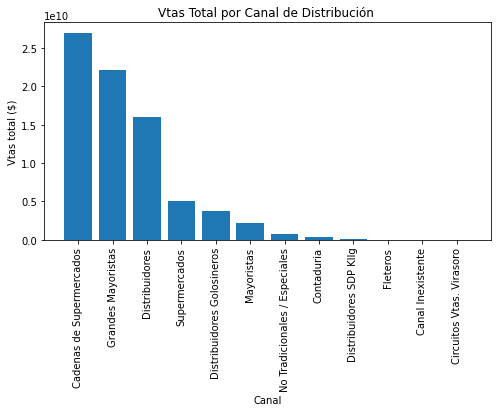

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x,y)
ax.set_title('Vtas Total por Canal de Distribución ')
ax.set_ylabel('Vtas total ($)')
ax.set_xlabel('Canal')
plt.xticks(rotation=90)
plt.show()

***Conclusión a:***

Graficamente se puede observar por tendencia que tanto las Cadenas de Supermercados y los Grandes Mayoristas son los que representan los mayores distribuidores de los productos.

***b- Costos de Ventas por Canal de distribución***

Para continuar el desglose de las variables, se continua con los costos evaluados por canal.

In [ ]:
df_CanalDistrib= df_CostoporCanalAcum['Costo Total Com'] 
df_CanalDistrib = df_CanalDistrib.sort_values(ascending=False) 
df_CanalDistrib

Canal de distribución
Cadenas de Supermercados         14598158301
Grandes Mayoristas               11502682534
Distribuidores                    8232377005
Supermercados                     2576572697
Distribuidores Golosineros        1941521547
Mayoristas                        1109486000
No Tradicionales / Especiales      375114164
Distribuidores SDP Kllg             62212242
Contaduria                          15135415
Fleteros                             2791066
Canal Inexistente                     758281
Circuitos Vtas. Virasoro              126635
Name: Costo Total Com, dtype: int64

Con este código solicitamos que nos muestre solamente la Costos por venta por Canal en forma ascendente.

In [ ]:
x= df_CanalDistrib.index 
y =df_CanalDistrib
y 

Canal de distribución
Cadenas de Supermercados         14598158301
Grandes Mayoristas               11502682534
Distribuidores                    8232377005
Supermercados                     2576572697
Distribuidores Golosineros        1941521547
Mayoristas                        1109486000
No Tradicionales / Especiales      375114164
Distribuidores SDP Kllg             62212242
Contaduria                          15135415
Fleteros                             2791066
Canal Inexistente                     758281
Circuitos Vtas. Virasoro              126635
Name: Costo Total Com, dtype: int64

Se definen las variables para los ejes dimensionales.

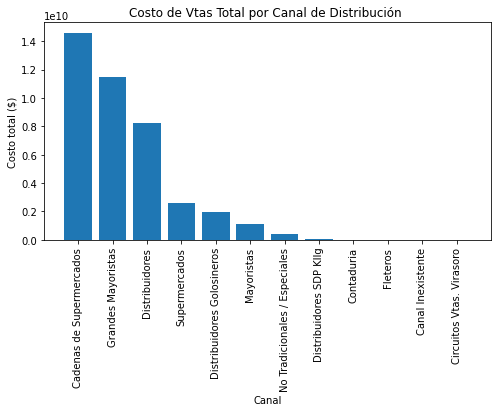

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x,y)
ax.set_title('Costo de Vtas Total por Canal de Distribución ')
ax.set_ylabel('Costo total ($)')
ax.set_xlabel('Canal')
plt.xticks(rotation=90)
plt.show()

***Conclusión b:***

Los costos acompañan la tendencia que mostró el punto anterior en que tanto Cadenas de Supermercados y Grandes Mayoristas son los canales que concentran la mayor cantidad de productos distribuidos.

***c- Facturación y Costos***

En este punto se mostrará la relación existente entre estas variables y cuales han sido sus comportamientos.

Text(0.5, 1.0, 'Relación entre Facturación y Costos por Canal de Distribución')

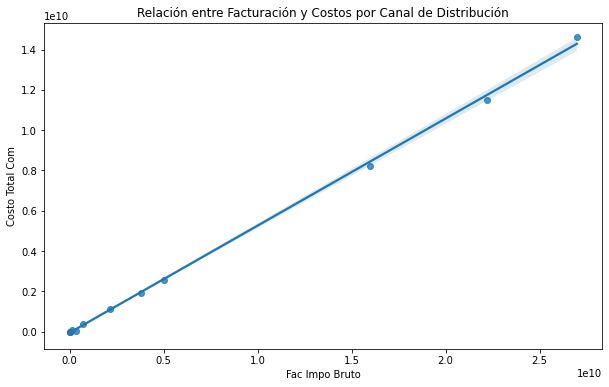

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_CostoporCanalAcum, x='Fac Impo Bruto', y='Costo Total Com')
plt.title("Relación entre Facturación y Costos por Canal de Distribución")

***Conclusión c:***

A partir de la agrupación de las variables por cadena de distribución, se evalua la relación que poseen las variables que nos brindrán información sobre rentabilidad. Las variables de facturación y de costos poseen una relación directamente proporcional.

# **5. Análisis Exploratorio de Datos (EDA)**

*“Es preferible una respuesta aproximada a la pregunta correcta, que frecuentemente es formulada de manera imprecisa, que una respuesta exacta a la pregunta incorrecta, que siempre puede ser formulada de manera precisa.” — John Tukey*


***a- Columnas, nulos y tipo de datos***

Veamos que contiene el dataset y su estructura

In [ ]:
df_FactyCosto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9287 entries, 2018 to 2017
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Linea                  9287 non-null   object
 1   Línea Unificada        9287 non-null   object
 2   Canal de distribución  9287 non-null   object
 3   Mes                    9287 non-null   object
 4   Fac Impo Bruto         9287 non-null   int64 
 5   Costo Total Com        9287 non-null   int64 
 6   Fac Kilos              9287 non-null   int64 
 7   Comercial Kilos        9287 non-null   int64 
 8   Anul Fact Kilos        9287 non-null   int64 
 9   Dev Irrecup Kilos      9287 non-null   int64 
 10  Dev Reparto Kilos      9287 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 870.7+ KB


En esta salida vemos las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos.

El data cuenta con 11 columnas, 9098 filas no nulas y 4 datos del tipo categoricos y números enteros.

***b- Descripción estadística de datos***

Busquemos los principales indices estadísticos de nuestras variables.

In [ ]:
df_FactyCosto.describe()

,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
count,9.287000e+03,9.287000e+03,9.287000e+03,9.287000e+03,9287.000000,9287.000000,9287.000000
mean,8.319427e+06,4.351991e+06,5.027898e+04,4.910968e+04,79.079574,65.423926,772.097233
std,3.022573e+07,1.631023e+07,1.877262e+05,1.843233e+05,1578.947241,354.384853,5381.728648
min,0.000000e+00,-7.647870e+05,0.000000e+00,-5.089400e+04,0.000000,0.000000,0.000000
25%,1.650750e+04,6.340500e+03,4.700000e+01,3.500000e+01,0.000000,0.000000,0.000000
50%,3.117910e+05,1.304180e+05,1.015000e+03,8.550000e+02,0.000000,0.000000,1.000000
75%,3.123630e+06,1.405134e+06,1.136450e+04,1.091400e+04,0.000000,10.000000,60.000000
max,5.029808e+08,2.288935e+08,2.251710e+06,2.391425e+06,96269.000000,17573.000000,134785.000000


1- Las variables de interés y para profundizar el estudio son Facturación y Costos.

2- La desviación estandar nos muestra que el Costo es un 60% aproximado del nivel Facturado.

3- Es de interés conocer cuanto puede absorber la empresa del incremento de los costos y cuanto se trasldada a la formación del precio que afecta la facturación final.

4- Será de interés desarrollar el análisis por producto para poder determinar cuales son los productos y canales que brindan rentabilidad a la empresa. (Es decir determinar por ejemplo si la línea de Yerba Mate ha tenido un comportamiento alcista y cuyo comportamiento absorbe la caída o falta de ventas de algún otro producto).

***c- Correlación de variables***

Verifiquemos si hay correlación entre los datos

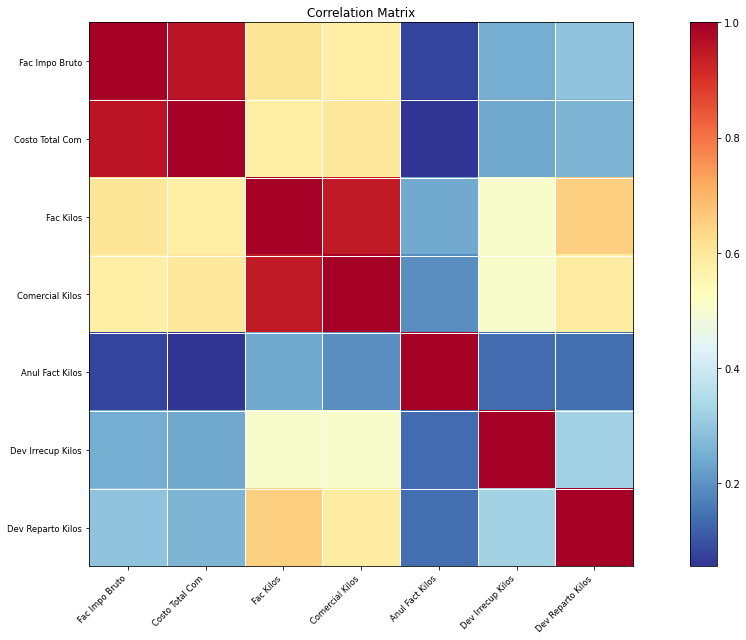

In [ ]:
corr= df_FactyCosto.corr()
sm.graphics.plot_corr(corr,xnames=(list(corr.columns)))
plt.show()

A partir de este tree map podemos concluir que las variables de interés y el resto no poseen correlación.

# **6. Análisis de Series Temporales**

Una serie temporal es cualquier conjunto de datos donde los valores se miden en diferentes puntos en el tiempo. Muchas series temporales son medidas uniformemente con una frecuencia específica, por ejemplo, las mediciones climáticas por hora, los recuentos diarios de visitas a sitios web o las ventas totales mensuales.

Para avanzar en nuestro estudio de caso, se aplicará "análisis de seties de tiempo", dado que se cuenta con la información para evaluar por producto y cadena.

A este fin se amplio el dataset con las fecha de facturas, generando un dataset más amplio para esta etapa.

En este segmento nos enfocaremos principalmente en "data wrangling" y en los aspectos de visualización del análisis de las series temporales. Trabajando con una serie temporal de datos mencionada en el párrafo anterior, se observará la forma en que técnicas como la indexación basada en el tiempo, el remuestreo y las ventanas deslizantes pueden ser de gran ayuda en la exploración de variaciones en la demanda de productos y el suministro por cadena de distribución a lo largo del tiempo. Los siguientes temas serán cubiertos:

1- Conjunto de datos: Open Power Systems Data.
2- Estructuras de datos de series temporales.
3- Indexación basada en el tiempo.
4- Visualización de datos de series temporales.
5- Estacionalidad.
6- Frecuencias.
7- Remuestreo.
8- Ventanas deslizantes.
9- Tendencias.


## ***6.1 - Open Power Systems Data***

Se explorará cómo la facturación y costos de productos han variado a lo largo del tiempo, utilizando las herramientas de las series temporales de Pandas para responder las siguientes preguntas:

¿Cuándo es el producto posee ventas tipicamente más altas y más bajas?
¿Cómo varía el costo de los productos con las estaciones del año?
¿Cuáles son las tendencias a largo plazo en el consumo de los porductos sustitutos y complementarios?
¿Cómo se compara la facturación por producto con el costo, y cómo ha cambiado esta relación con el tiempo?



## ***6.2- Estructura de datos de series temporales***

Para trabajar con datos de series temporales, se utilizará un DatatimeIdex de fecha/hora como el índice para nuestro DataFrame. Veamos cómo hacer esto con nuestro conjunto de datos OPSD. Primero, usamos la función read_csv() para leer los datos en un DataFrame, y luego mostrar su forma.


In [ ]:
linea_de_Productos = "/content/3.Base Prod por canal de distrib - Silvana Tomsig - Sebastián de León.csv"
df_LineaProductos = pd.read_csv(linea_de_Productos,index_col=5, encoding='latin-1', sep=";")
df_LineaProductos.head()

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
Fecha,,,,,,,,,,,,
1/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,0,0,0,0,0,0.0,0.0
2/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,86411,54447,7170,98235,0,0.0,0.0
3/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,380247,111744,29270,13105,0,0.0,10.0
4/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,1734296,-45159,134115,-97355,19500,0.0,6825.0
5/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,188428,172686,12410,12430,0,0.0,0.0


El DataFrame tiene 97335 filas, que abarcan desde el 1 de enero de 2017 hasta el 02 de agosto de 2022. Para ver el los datos, se utilizan los métodos head() y tail() que muestran las primeras y las últimas filas del documento

Cabe destacar  que se realizo un Data Wrailing del dataset del cual se depuro valores nulos, productos con ventas en pocas fechas y canales que no poseían gran movimientos.

In [ ]:
df_LineaProductos.head(10)

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
Fecha,,,,,,,,,,,,
1/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,0,0,0,0,0,0.0,0.0
2/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,86411,54447,7170,98235,0,0.0,0.0
3/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,380247,111744,29270,13105,0,0.0,10.0
4/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,1734296,-45159,134115,-97355,19500,0.0,6825.0
5/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,188428,172686,12410,12430,0,0.0,0.0
6/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,254399,0,20145,0,0,0.0,0.0
7/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,146877,16318,11284,1468,1083,0.0,380.0
8/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,94214,86343,6205,6215,0,0.0,0.0
9/1/2017,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,1122558,12251,87900,2700,0,0.0,12675.0


Para definir el índice que se desea, se utilizan los parámetros index_col y parse_dates de la función read_csv(). Esto suele ser un atajo útil.

In [ ]:
df_LineaProductos_fecha = pd.read_csv(linea_de_Productos,index_col=5, encoding='latin-1', sep=";",parse_dates=True)
df_LineaProductos_fecha.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01',
               ...
               '2020-06-30', '2020-09-17', '2020-09-21', '2021-01-19',
               '2021-01-26', '2021-09-30', '2021-07-10', '2022-09-06',
               '2022-06-21', '2022-06-23'],
              dtype='datetime64[ns]', name='Fecha', length=97335, freq=None)

El índice de el DataFrame es un índice de fecha y hora, se puede utilizar la indexación basada en el tiempo para organizar y analizar datos.

In [ ]:
df_LineaProductos_fecha['Año']= df_LineaProductos_fecha.index.year
df_LineaProductos_fecha['Mes']= df_LineaProductos_fecha.index.month
df_LineaProductos_fecha.sample(15, random_state=0) 

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos,Año
Fecha,,,,,,,,,,,,,
2020-09-09,YERBA MATE TRADICIONAL,Yerba Mate,Cadenas de Supermercados,2020,9,6625061,1230126,30907,6945,0,0.0,10.0,2020
2022-04-07,YERBA MATE BCP,Yerba Mate,Supermercados,2022,4,3450681,-6558,7433,-25,0,0.0,25.0,2022
2021-05-14,SNACKS SALADOS,Snacks,Supermercados,2021,5,1647,276,1,0,0,0.0,0.0,2021
2019-08-10,TE SILVESTRES,Té,Cadenas de Supermercados,2019,8,512874,95160,317,141,0,0.0,0.0,2019
2021-01-23,MATE COCIDO,Mate Cocido,Cadenas de Supermercados,2021,1,5326,0,30,0,0,0.0,0.0,2021
2019-09-15,ARROZ (Pilaga),Arroz,Grandes Mayoristas,2019,9,326,2998,25,410,0,0.0,0.0,2019
2017-11-01,TE SILVESTRES,Té,Grandes Mayoristas,2017,11,767,-79,2,0,0,0.0,0.0,2017
2017-01-31,MATE COCIDO,Mate Cocido,Supermercados,2017,1,133542,193172,1122,3424,0,0.0,0.0,2017
2019-05-11,SNACKS (Pilaga),Snacks,Grandes Mayoristas,2019,5,0,930,0,7,0,0.0,0.0,2019


Un aspecto útil del indexado de fecha es que los componentes de fecha individualmente están disponibles como atributos, como año (year), mes (month), día (day), entre otros. Se agregarán algunas columnas mas al dataframe, que contienen el año y mes

## ***6.3-Indexación basada en el Tiempo***

Una de las características más poderosas y convenientes de las series temporales es la indexación basada en el tiempo: el uso de fechas y horas para organizar y acceder de forma intuitiva a los datos. Con la indexación basada en el tiempo, se pueden utilizar cadenas de caracteres con formato de fecha/hora para seleccionar datos en el DataFrame con la función loc. Esto funciona de manera similar a la indexación basada en etiquetas estándar, pero con algunas características adicionales.

Para nuesto Dataframe no será útil el uso de hora, lo que si nos permitirá evaluar de manera puntial con fechas las líneas de productos.

***a- Intervalo cerrado***

Vamos a seleccionar un intervalo cerrado de un año

In [ ]:
df_LineaProductos_fecha.loc['2019-01-01':'2019-12-31']

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos,Año
Fecha,,,,,,,,,,,,,
2019-01-01,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2019,1,0,0,0,0,0,0.0,0.0,2019
2019-02-01,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2019,2,550446,63055,20305,5060,0,0.0,15.0,2019
2019-03-01,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2019,3,1977609,117663,73600,9805,0,0.0,0.0,2019
2019-04-01,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2019,4,726569,-2506,25425,-140,0,0.0,160.0,2019
2019-07-01,ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2019,7,448241,189493,12495,14430,0,366.0,0.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-02,TE A GRANEL (Y),Té,Grandes Mayoristas,2019,5,127728,0,1120,0,0,0.0,0.0,2019
2019-08-08,TE A GRANEL (Y),Té,Grandes Mayoristas,2019,8,0,0,0,1120,0,0.0,0.0,2019
2019-10-09,TE A GRANEL (Y),Té,Grandes Mayoristas,2019,10,164003,0,1120,0,0,0.0,0.0,2019


En la evolución gráfica de kilos comerciales del punto 4.1.b se muestra que ese año es el año que más kilos se venden, en cambio en Facturación tal cual lo muestra el punto 4.1.a el año con mejores ventas es 2021. 

Con est herramienta de series analizaremos estos puntos.

# ***6.4-Visualización de Datos de Series Temporales***

Con pandas y matplotlib, se pueden visualizar fácilmente nuestros datos de las series temporales. En esta sección, se cubrirán algunos ejemplos y algunas personalizaciones. 

a- Facturación en pesos

Se creará un gráfico de líneas de la series temporales completas de la facturación diaria de todos los productos comercializados, utilizando el método plot().

In [ ]:
df_Kilos_2019= df_LineaProductos_fecha.loc['2019-07','Fac Kilos'].sort_index()
df_Kilos_2019 = df_Kilos_2019.groupby(df_Kilos_2019.index).sum()
df_Kilos_2019

Fecha
2019-07-01    323464
2019-07-02    353665
2019-07-03    512409
2019-07-04     31093
2019-07-05    562551
2019-07-06    598534
2019-07-07     42596
2019-07-08    419430
2019-07-09     54338
2019-07-10    545097
2019-07-11    432138
2019-07-12    129366
2019-07-13     84556
2019-07-14     12222
2019-07-15    513257
2019-07-16    467713
2019-07-17    596434
2019-07-18    377543
2019-07-19    250861
2019-07-20     93213
2019-07-21     29134
2019-07-22    292601
2019-07-23    229639
2019-07-24    367063
2019-07-25    214106
2019-07-26    446892
2019-07-27      2841
2019-07-28      4766
2019-07-29    319172
2019-07-30    314291
2019-07-31    384669
Name: Fac Kilos, dtype: int64

In [ ]:
x= df_Kilos_2019.index
y =df_Kilos_2019
y


Fecha
2019-07-01    323464
2019-07-02    353665
2019-07-03    512409
2019-07-04     31093
2019-07-05    562551
2019-07-06    598534
2019-07-07     42596
2019-07-08    419430
2019-07-09     54338
2019-07-10    545097
2019-07-11    432138
2019-07-12    129366
2019-07-13     84556
2019-07-14     12222
2019-07-15    513257
2019-07-16    467713
2019-07-17    596434
2019-07-18    377543
2019-07-19    250861
2019-07-20     93213
2019-07-21     29134
2019-07-22    292601
2019-07-23    229639
2019-07-24    367063
2019-07-25    214106
2019-07-26    446892
2019-07-27      2841
2019-07-28      4766
2019-07-29    319172
2019-07-30    314291
2019-07-31    384669
Name: Fac Kilos, dtype: int64

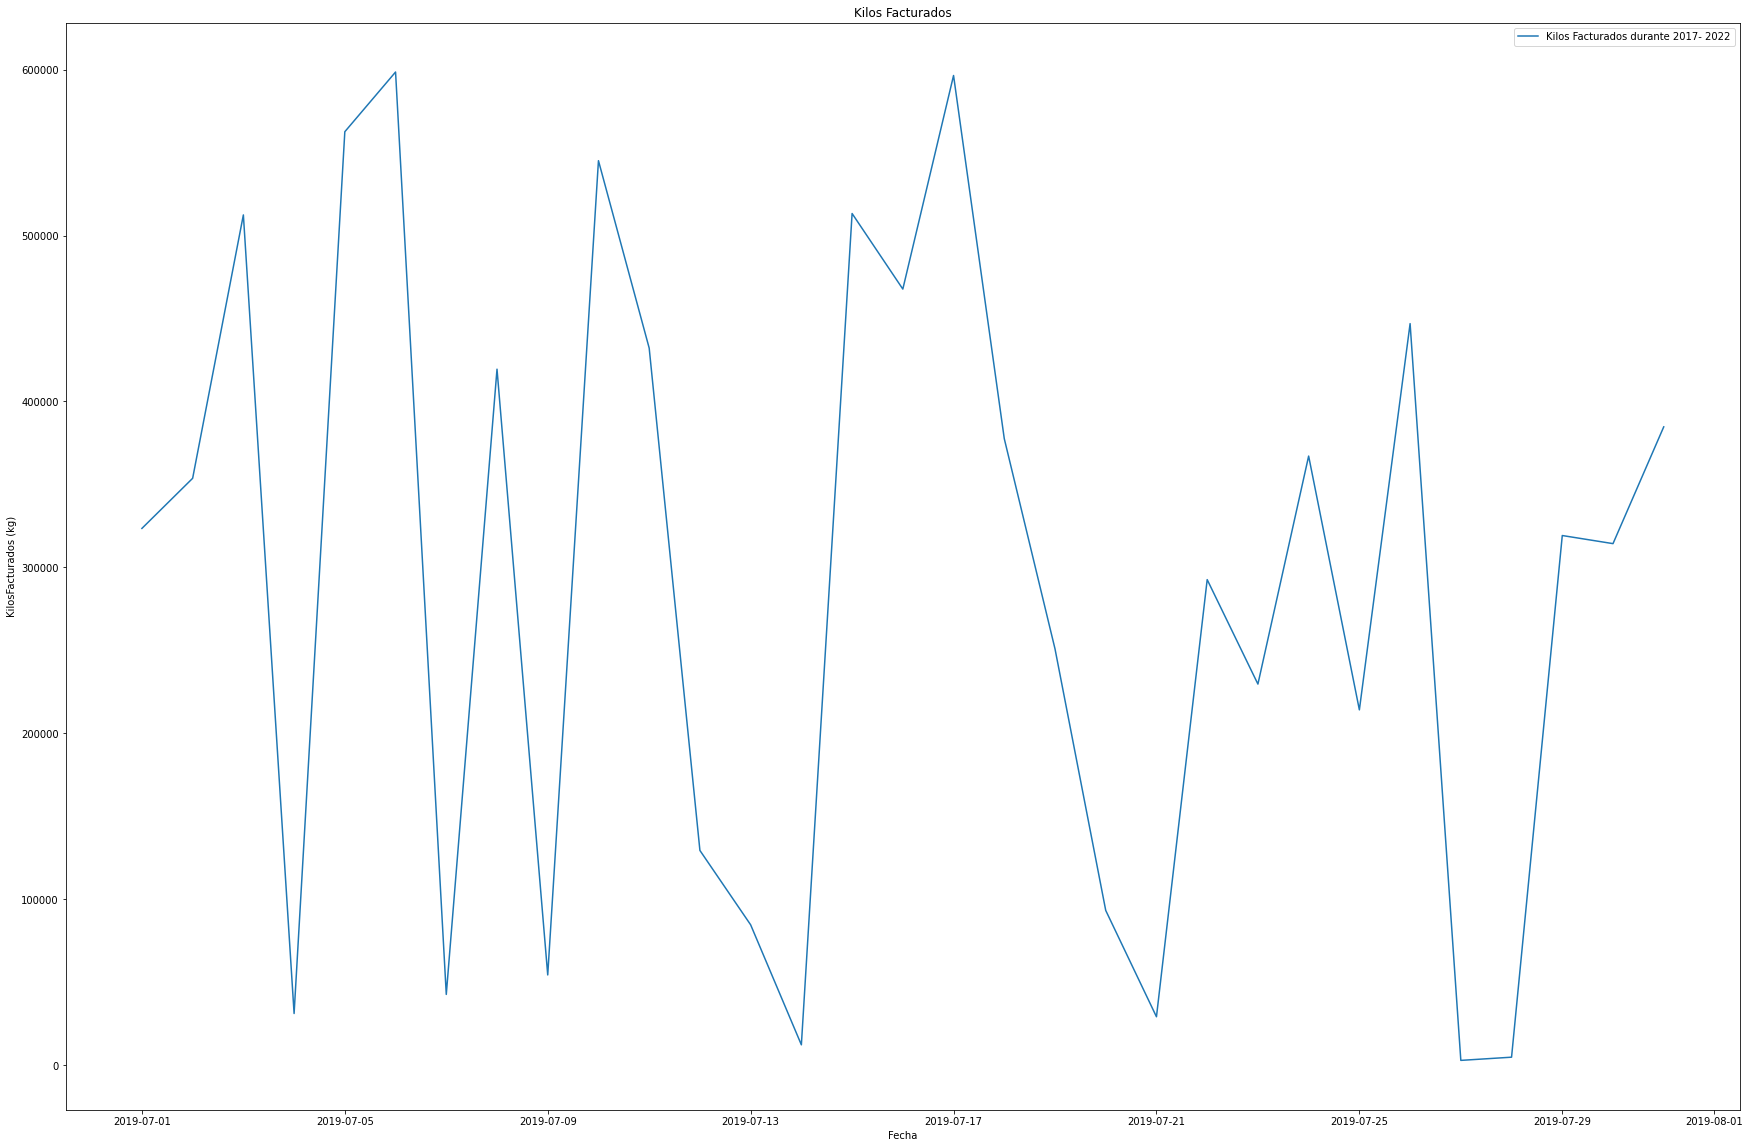

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(x, y, label='Kilos Facturados durante 2017- 2022')
ax.set_xlabel('Fecha')                  
ax.set_ylabel('KilosFacturados (kg)')
ax.set_title('Kilos Facturados')
ax.legend() 

## ***6.5-Estacionalidad***

Se profundizará en la estacionalidad de los datos con diagramas de caja, utilizando seaborn para agrupar los datos por diferentes períodos de tiempo y mostrar las distribuciones de cada grupo. Primero se agrupan los datos por mes, para visualizar la estacionalidad anual.

In [ ]:
x= df_LineaProductos_fecha['Mes'].index, 
y=df_LineaProductos_fecha['Mes']
y


Fecha
2017-01-01    1
2017-02-01    2
2017-03-01    3
2017-04-01    4
2017-05-01    5
             ..
2021-09-30    9
2021-07-10    7
2022-09-06    9
2022-06-21    6
2022-06-23    6
Name: Mes, Length: 97335, dtype: int64

In [ ]:
df_LP_acum=df_LineaProductos.groupby('Anio').sum()
df_LP_acum

,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
Anio,,,,,,,
2002,691728,2203898,5075,39980,0,0.0,20.0
2017,4710488700,2429460624,103517959,99546015,288570,130255.0,1455537.0
2018,6269926734,3403740578,100278225,98792074,77358,115415.0,1352065.0
2019,10858564820,5030223211,106363550,103336072,276332,135515.0,1309921.0
2020,13465443515,7190228518,60567931,54203320,76191,49668.0,440071.0
2021,21379863090,11980701926,62537909,62186948,2368,67674.0,844891.0
2022,18550225973,9731996575,40595348,40182177,1052,25242.0,539223.0


In [ ]:
df_LP_Facturacion_acum= df_LP_acum['Fac Impo Bruto'] 
df_LP_Facturacion_acum = df_LP_Facturacion_acum.sort_values(ascending=False) 
df_LP_Facturacion_acum

Anio
2021    21379863090
2022    18550225973
2020    13465443515
2019    10858564820
2018     6269926734
2017     4710488700
2002         691728
Name: Fac Impo Bruto, dtype: int64

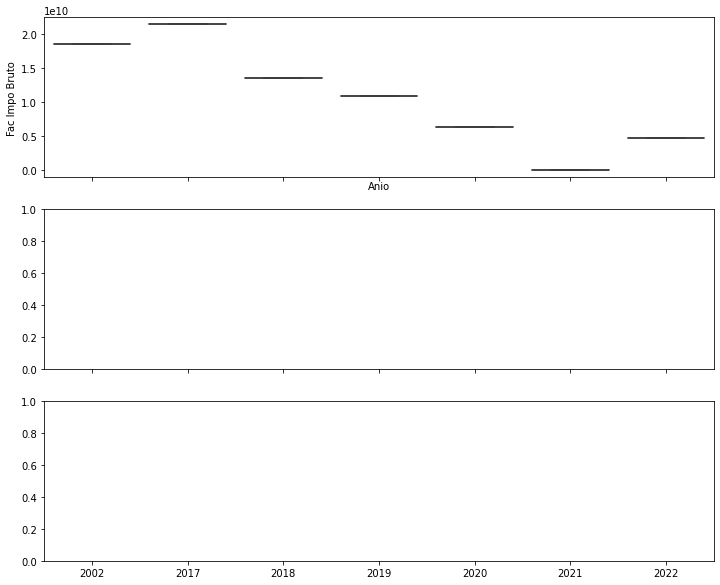

In [ ]:
fig, ejes = mplt.subplots(3, 1, figsize=(12, 10), sharex=True)
for nombre, eje in zip(['Fac Impo Bruto', ], ejes):
    sbn.boxplot(data= df_LP_acum,x=df_LP_Facturacion_acum.index ,y=nombre,ax=eje)


# ***6.6- Remuestreo***

A menudo es útil aplicar el remuestreo en datos de series temporales a una frecuencia más baja o más alta. El remuestreo a una frecuencia más baja (submuestreo) generalmente implica una operación de recolección o sumatoria, por ejemplo, calcular la distancia recorrida por un autobús en un mes, tomando las distancias que recorrió cada día de dicho mes. El remuestreo a una frecuencia más alta (sobremuestreo) es menos común y, a menudo, implica la interpolación, aproximación u otro método de llenado de datos.

Esta sección estará centrada en el submuestreo, y cómo puede ayudar en el análisis de los datos de OPSD en varias escalas de tiempo. Se utilizará el método resample() del DataFrame, que divide el DatetimeIndex en intervalos de tiempo y agrupa los datos por intervalo de tiempo. El método resample() devuelve un objeto Resampler, similar al objeto de pandas  GroupBy. Luego se puede aplicar un método de agregación como mean() (calcula la media), median() (calcula la mediana), sum() (calcula la suma), entre otros, al grupo de datos para cada intervalo de tiempo.

In [ ]:
columnas = ['Fac Kilos','Costo Total Com','Fac Impo Bruto']
media_df_LíneaProductos_mensual= df_LineaProductos_fecha[columnas].resample('W').mean()
media_df_LíneaProductos_mensual.head(15)

,Fac Kilos,Costo Total Com,Fac Impo Bruto
Fecha,,,
2002-11-24,5075.0,2203898.0,691728.0
2002-12-01,NaN,NaN,NaN
2002-12-08,NaN,NaN,NaN
2002-12-15,NaN,NaN,NaN
2002-12-22,NaN,NaN,NaN
2002-12-29,NaN,NaN,NaN
2003-01-05,NaN,NaN,NaN
2003-01-12,NaN,NaN,NaN
2003-01-19,NaN,NaN,NaN


In [ ]:
opsd_anual = df_LineaProductos_fecha[columnas].resample('A').sum(min_count=360)
opsd_anual = opsd_anual.set_index(opsd_anual.index.year)
opsd_anual.head(10)

,Fac Kilos,Costo Total Com,Fac Impo Bruto
Fecha,,,
2002,NaN,NaN,NaN
2003,NaN,NaN,NaN
2004,NaN,NaN,NaN
2005,NaN,NaN,NaN
2006,NaN,NaN,NaN
2007,NaN,NaN,NaN
2008,NaN,NaN,NaN
2009,NaN,NaN,NaN
2010,NaN,NaN,NaN


In [ ]:
opsd_anual.index.name='Año'
opsd_anual['Fac Impo Bruto/Fac Kilos'] = opsd_anual['Fac Impo Bruto'] / opsd_anual['Fac Kilos']
opsd_anual.tail(4)

,Fac Kilos,Costo Total Com,Fac Impo Bruto,Fac Impo Bruto/Fac Kilos
Año,,,,
2019,106363550.0,5.030223e+09,1.085856e+10,102.089154
2020,60567931.0,7.190229e+09,1.346544e+10,222.319688
2021,62537909.0,1.198070e+10,2.137986e+10,341.870450
2022,40595348.0,9.731997e+09,1.855023e+10,456.954476


# ***6.7- Tendencias***

Los datos de series temporales a menudo muestran una variabilidad lenta y gradual, además de una variabilidad de frecuencia más alta, como la estacionalidad y el ruido. Una forma fácil de visualizar estas tendencias es con medias deslizantes en diferentes escalas de tiempo.

Una media deslizante tiende a suavizar una serie temporal promediando las variaciones en frecuencias mucho más altas que el tamaño de la ventana y promediando cualquier estacionalidad en una escala de tiempo igual al tamaño de la ventana. Esto permite explorar variaciones de baja frecuencia en los datos. Dado que la serie temporal que está siendo utilizada tiene estacionalidad semanal y anual, se verán las medias deslizantes en esas dos escalas de tiempo.

se calculará la media deslizante de 365 días de los datos de OPSD.

In [ ]:
opsd_365d = df_LineaProductos_fecha[columnas].rolling(window=365,center=True,min_periods=30).mean()
opsd_365d

,Fac Kilos,Costo Total Com,Fac Impo Bruto
Fecha,,,
2017-01-01,43365.978142,343797.000000,568975.448087
2017-02-01,43418.472826,343450.907609,569616.902174
2017-03-01,43189.291892,342487.767568,566642.097297
2017-04-01,43017.198925,344342.903226,564531.736559
2017-05-01,43050.342246,358351.390374,565296.149733
...,...,...,...
2021-09-30,82.973262,3466.967914,21943.598930
2021-07-10,83.419355,3485.607527,22060.908602
2022-09-06,83.870270,3504.254054,22180.156757


# ***6.8- Frecuencias***

Cuando los datos de una serie temporal están distanciados en el tiempo de forma uniforme, la serie puede asociarse con una frecuencia en pandas. Por ejemplo, con la función date_range() se creará una secuencia de fechas espaciadas uniformemente desde 2017-01-01 hasta 2017-12-21 a una frecuencia diaria.

In [ ]:
import pandas as pnd
pnd.to_datetime('2019-07-18')
pnd.to_datetime('9/8/1993')

pnd.to_datetime('9/8/1993', dayfirst=True)                                               


Timestamp('1993-08-09 00:00:00')

In [ ]:
pnd.to_datetime(['2019-07-18','9/8/1993','12/15/2003'])                                                                                                                                     


DatetimeIndex(['2019-07-18', '1993-09-08', '2003-12-15'], dtype='datetime64[ns]', freq=None)

En el DatetimeIndex anterior, el tipo de datos datetime64[ns] indica que los datos subyacentes se almacenan como enteros de 64 bits, en unidades de nanosegundos (ns). Esta estructura de datos permite que pandas almacene de forma compacta grandes secuencias de valores de fecha/hora y realice operaciones vectorizadas de manera eficiente utilizando arreglos NumPy datetime64.

In [ ]:
pnd.date_range('2017-01-01','2022-08-02',freq='D')                                        


DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-07-30', '2022-07-31',
               '2022-08-01', '2022-08-02'],
              dtype='datetime64[ns]', length=2040, freq='D')

El DatetimeIndex resultante tiene un atributo de frecuencia (freq) con un valor de ‘D’, que indica la frecuencia diaria.

A continuación, se revisará el DatatimeIndex de la serie de tiempo

In [ ]:
df_LineaProductos_fecha.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01',
               ...
               '2020-06-30', '2020-09-17', '2020-09-21', '2021-01-19',
               '2021-01-26', '2021-09-30', '2021-07-10', '2022-09-06',
               '2022-06-21', '2022-06-23'],
              dtype='datetime64[ns]', name='Fecha', length=97335, freq=None)

Se puede ver que no tiene frecuencia (freq=None). Esto tiene sentido, ya que el índice se creó a partir de una secuencia de fechas en el archivo CSV, sin especificar frecuencia para la serie temporal

# **7. Pronóstico de series temporales**

Una vez que tenemos confirmado que nuestra serie es estacionaria, podemos hacer pronóstico. Existen diversos métodos para hacer pronóstico. 



In [ ]:
df_LineaProductos.describe()

,Anio,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
count,97335.000000,9.733500e+04,9.733500e+04,97335.000000,9.733500e+04,97335.000000,95345.000000,95345.000000
mean,2019.086927,7.729512e+05,4.085741e+05,4868.402907,4.708343e+03,7.416356,5.493408,62.318192
std,1.600804,2.550182e+06,2.506792e+06,15482.607039,2.986704e+04,447.533475,70.142396,931.612417
min,2002.000000,0.000000e+00,-1.098530e+07,0.000000,-3.633600e+05,0.000000,0.000000,0.000000
25%,2018.000000,2.162000e+03,0.000000e+00,10.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,2019.000000,5.410000e+04,8.539000e+03,190.000000,5.500000e+01,0.000000,0.000000,0.000000
75%,2020.000000,4.199950e+05,9.755400e+04,1916.000000,8.550000e+02,0.000000,0.000000,0.000000
max,2022.000000,6.842425e+07,1.133360e+08,451765.000000,1.316085e+06,91191.000000,6210.000000,60240.000000


Para hacer esta transformación usaré una función llamada series_to_supervised(). 

Antes de usar la función, utilizamos el MinMaxScaler para transformar el rango de nuestros valores entre -1 y 1 (pues sabemos que a nuestra red neuronal, le favorece para realizar los cálculos).

Entonces aqui vemos cómo queda nuestro set de datos de entrada.

In [ ]:
# convert series to supervised learning
def series_to_supervised(df_LíneaProductos, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(df_LíneaProductos) is list else df_LíneaProductos.shape[1]
    df_LíneaProductos1 = pd.DataFrame(df_LíneaProductos)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df_LíneaProductos1.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df_LíneaProductos1.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


Para esta primera instancia dejamos las bases sentadas para generar un prónostico a partir de Redes Neuronales.

# **8. Limpieza de dataset**

En primera instancia se evaluó la serie de datos identificando los datos faltantes para una serie de tiempo, posteriormente se identifico aquellos productos que no eran relevantes para el análisis y se realizó la depuración de la base.

En segunda instancia, se agregarón los datos faltantes para la serie de tiempo.

La base de datos no cuenta con datos nulos o duplicados, ya que la base se depura desde el comienzo, además al ser una serie de tiempo y de venta de productos, por lo cual es díficil que cuente con estas anomalías.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as mplt
import seaborn as sbn
import matplotlib.pylab as pltlab
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler


In [ ]:
Proddepurados = "/content/3.Base Prod por canal de distrib - Silvana Tomsig - Sebastián de León.csv"
df_Proddepurados = pd.read_csv(Proddepurados,index_col=0, encoding='latin-1', sep=";")
df_Proddepurados.head()

,Línea Unificada,Canal de distribución,Anio,Mes,Fecha,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
Linea,,,,,,,,,,,,
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,1/1/2017,0,0,0,0,0,0.0,0.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,2/1/2017,86411,54447,7170,98235,0,0.0,0.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,3/1/2017,380247,111744,29270,13105,0,0.0,10.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,4/1/2017,1734296,-45159,134115,-97355,19500,0.0,6825.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,5/1/2017,188428,172686,12410,12430,0,0.0,0.0


# **9. Obtención de Insights**

Para entender realmente el conjunto de datos, se  estudia el significado y la relevancia de cada variable con respecto al problema. Intentará responder a diversas cuestiones sobre ellas, como:

* La relevancia de la variable facturación y costos por línea de producto y/o cadena.
* La importancia de las variables.
* Solapamiento con otras variables.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [2]:
InfusionesyOtros= "/content/3.Base Prod por canal de distrib - Silvana Tomsig - Sebastián de León.csv"
df_InfusionesyOtros=pd.read_csv(InfusionesyOtros,index_col=0, encoding='latin-1', sep=";")
df_InfusionesyOtros.head(10)

,Línea Unificada,Canal de distribución,Anio,Mes,Fecha,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Anul Fact Kilos,Dev Irrecup Kilos,Dev Reparto Kilos
Linea,,,,,,,,,,,,
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,1/1/2017,0,0,0,0,0,0.0,0.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,2/1/2017,86411,54447,7170,98235,0,0.0,0.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,3/1/2017,380247,111744,29270,13105,0,0.0,10.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,4/1/2017,1734296,-45159,134115,-97355,19500,0.0,6825.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,5/1/2017,188428,172686,12410,12430,0,0.0,0.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,6/1/2017,254399,0,20145,0,0,0.0,0.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,7/1/2017,146877,16318,11284,1468,1083,0.0,380.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,8/1/2017,94214,86343,6205,6215,0,0.0,0.0
ARROZ (Pilaga),Arroz,Cadenas de Supermercados,2017,Enero,9/1/2017,1122558,12251,87900,2700,0,0.0,12675.0


En este punto, se muestra las columnas del csv para poder identificar las variables objetivos.

In [3]:
df_InfusionesyOtros.columns

Index(['Línea Unificada', 'Canal de distribución', 'Anio', 'Mes', 'Fecha',
       'Fac Impo Bruto', 'Costo Total Com', 'Fac Kilos', 'Comercial Kilos',
       'Anul Fact Kilos', 'Dev Irrecup Kilos', 'Dev Reparto Kilos'],
      dtype='object')

# ***9.1. Análisis univariable: 'Facturación Importe Bruto'***

La variable 'Fac Impo Bruto' es una de las variables objetivo de este conjunto de datos, por lo que se estudiará con mayor detenimiento:


In [4]:
df_InfusionesyOtros['Fac Impo Bruto'].describe()

count    9.733500e+04
mean     7.729512e+05
std      2.550182e+06
min      0.000000e+00
25%      2.162000e+03
50%      5.410000e+04
75%      4.199950e+05
max      6.842425e+07
Name: Fac Impo Bruto, dtype: float64

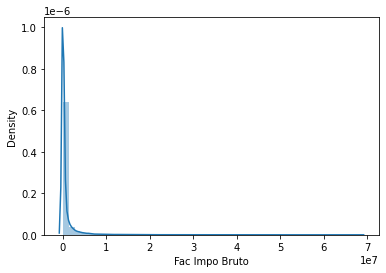

In [5]:
sns.distplot(df_InfusionesyOtros['Fac Impo Bruto']);

A simple vista se pueden apreciar:

- Una desviación con respecto a la distribución normal.
- Una asimetría positiva.
- Algunos picos.

In [6]:
print("Skewness: %f" % df_InfusionesyOtros['Fac Impo Bruto'].skew())
print("Kurtosis: %f" % df_InfusionesyOtros['Fac Impo Bruto'].kurt())

Skewness: 7.972235
Kurtosis: 93.238833


**a- Relación con variables numéricas**

* Diagrama de dispersión Costo Total Com/Fac Impo Bruto:

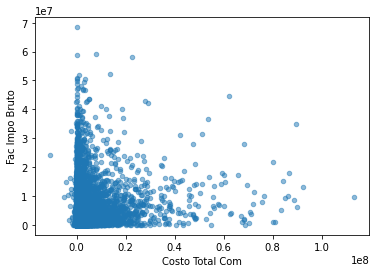

In [7]:
var = 'Costo Total Com'
data = pd.concat([df_InfusionesyOtros['Fac Impo Bruto'], df_InfusionesyOtros[var]], axis=1)
data.plot.scatter(x=var, y='Fac Impo Bruto', alpha = 0.5);


* Diagrama de dispersión Fac Kilos/Fac Impo Bruto

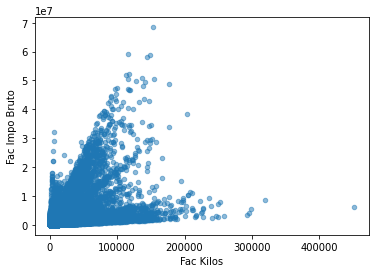

In [8]:
var = 'Fac Kilos'
data = pd.concat([df_InfusionesyOtros['Fac Impo Bruto'], df_InfusionesyOtros[var]], axis=1)
data.plot.scatter(x=var, y='Fac Impo Bruto', alpha = 0.5);

**b- Relación con variables categóricas**

* Diagrama de cajas Año/Fac Impo Bruto:

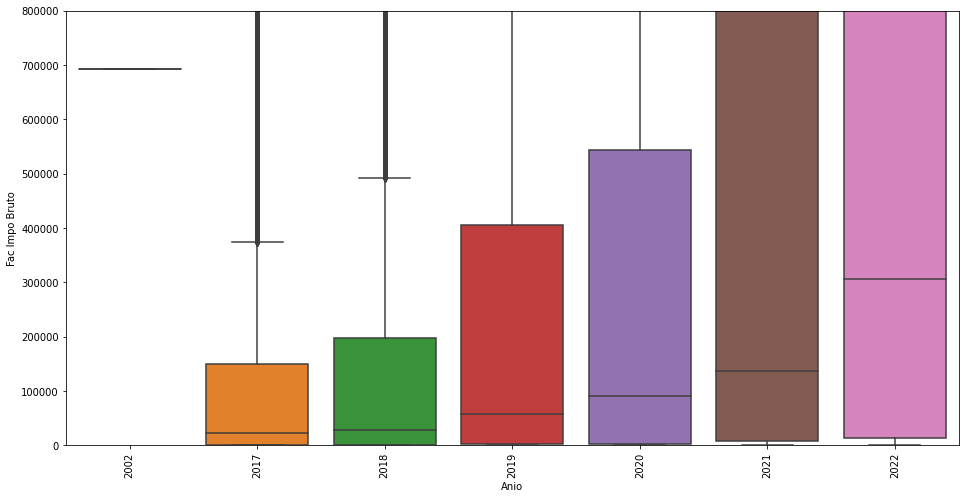

In [9]:
var = 'Anio'
data = pd.concat([df_InfusionesyOtros['Fac Impo Bruto'], df_InfusionesyOtros[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Fac Impo Bruto", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

***Resumiendo***:

a- 'Costo Total Com' y 'Fac Kilos' mantienen una relación lineal positiva con 'Fac Impo Bruto', aumentando en el mismo sentido. En el caso de 'Fac Kilos', la pendiente de esta relación es muy acentuada.


b- 'Anio' también parece relacionada con 'Fac Impo Bruto' fuerte, tal y como se puede observar en los diagramas de cajas.

Sólo he explorado tres variables, pero hay muchas otras a analizar.

# ***9.2. Análisis multivariable***

Hasta ahora sólo se realizó el análisis de las variables que se ha creído importantes. Es hora de un análisis más objetivo.

Para ello se va realizar las siguientes pruebas de correlación:

* Matriz de correlación general.
* Matriz de correlación centrada en la variable 'Fac Impo Bruto'.
* Diagramas de dispersión entre las variables más correladas.

***a-Matriz de correlación (en forma de mapa de calor)***

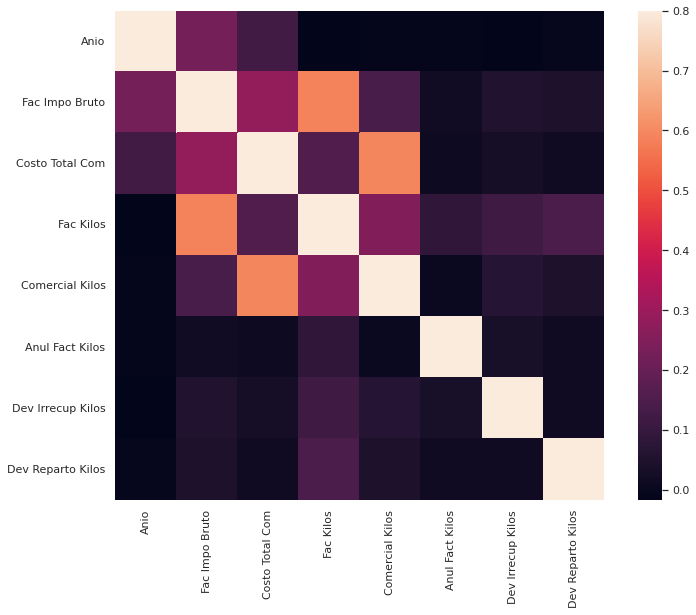

In [18]:
corrmat = df_InfusionesyOtros.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. A primera vista hay dos variables que llaman la atención: 'Fac Kilos' y 'Comercial Kilos', seguidas por las variables 'Costo Total Com'. En ambos casos parece haber una correlación significativa; en realidad es tan fuerte que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

Con respecto a las correlaciones de la variable 'Fac Impo Bruto', destacan las vistas anteriormente ('Costo Total Com', 'Fac Kilos' y 'Anio'), pero hay otras que también deberían ser tenidas en cuenta.

***b- Matriz de correlación de 'Fac Impo Bruto'***

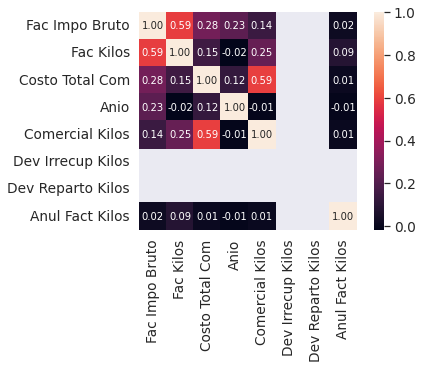

In [19]:
k = 10 
cols = corrmat.nlargest(k, 'Fac Impo Bruto')['Fac Impo Bruto'].index
cm = np.corrcoef(df_InfusionesyOtros[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [20]:
corr = df_InfusionesyOtros.corr()
corr[['Fac Impo Bruto']].sort_values(by = 'Fac Impo Bruto',ascending = False).style.background_gradient()

,Fac Impo Bruto
Fac Impo Bruto,1.000000
Fac Kilos,0.587497
Costo Total Com,0.283390
Anio,0.225577
Comercial Kilos,0.141153
Dev Irrecup Kilos,0.054469
Dev Reparto Kilos,0.045171
Anul Fact Kilos,0.020865


En estas matrices de correlación se puede observar:

'Fac Kilos' está fuertemente correlacionada con 'Fac Impo Bruto'.

# **9.3. Comprobación de normalidad**

En este momento, hay que comprobar cuatro suposiciones fundamentales:

* Normalidad - Cuando hablamos de normalidad lo que queremos decir es que los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Sólo voy a comprobar la normalidad de la variable 'Fac Impo Bruto', aunque resulte un tanto limitado ya que no asegura la normalidad multivariable. Además, si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.

* Homocedasticidad - La homocedasticidad se refiere a la suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras. La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.

* Linealidad- La forma más común de evaluar la linealidad es examinar los diagramas de dispersión y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos. Sin embargo, no voy a entrar en esto porque la mayoría de los gráficos de dispersión que hemos visto parecen tener relaciones lineales.

* Ausencia de errores correlacionados - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo. Tampoco voy a tocar este asunto.



***a- En búsqueda de la normalidad***

El objetivo es estudiar la variable 'Fac Impo Bruto' de forma fácil, comprobando:

- Histograma 
- Curtosis y asimetría.
- Gráfica de probabilidad normal 
- La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.

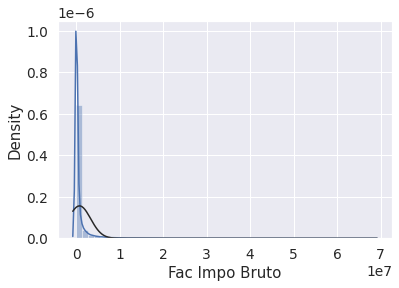

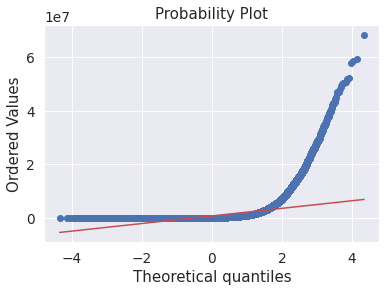

In [21]:
sns.distplot(df_InfusionesyOtros['Fac Impo Bruto'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_InfusionesyOtros['Fac Impo Bruto'], plot = plt)

De estos gráficos se desprende que 'Fac Impo Bruto' no conforma una distribución normal, presenta similitud a una Chi Cuadrado. Muestra picos, asimetría positiva y no sigue la línea diagonal.

Terminado el trabajo con 'Fac Impo Bruto', voy a seguir con 'Costo Total Com'.

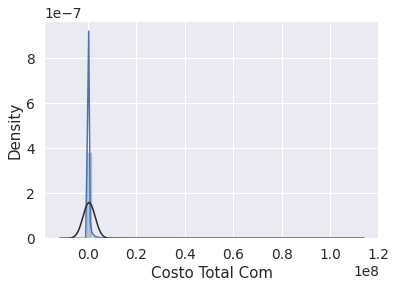

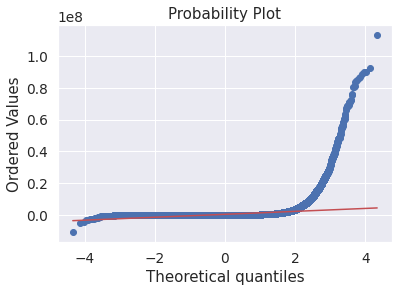

In [22]:
sns.distplot(df_InfusionesyOtros['Costo Total Com'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_InfusionesyOtros['Costo Total Com'], plot = plt)

La variable 'Costo Total Com' muestra asimetría, al igual que la variable 'Fac Impo Bruto' muestra una similitud con una distribución del tipo Chi cuadrado. Sus picos son asimetricamente positivos y no conitnuan con la recta diagonal.

***b- En búsqueda de la homocedasticidad***

El mejor método para probar la homocedasticidad para dos variables métricas es de forma gráfica. Las desviaciones de una dispersión uniforme se muestran mediante formas tales como conos (pequeña dispersión a un lado del gráfico, gran dispersión en el lado opuesto) o diamantes (un gran número de puntos en el centro de la distribución).

Empiezo por 'Fac Impo Bruto' y 'Costo Total Com'.

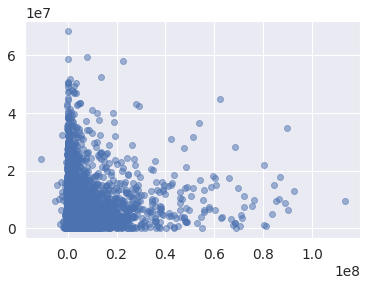

In [23]:
plt.scatter(df_InfusionesyOtros['Costo Total Com'], df_InfusionesyOtros['Fac Impo Bruto'], alpha = 0.5);

En este caso las variables de estudio muestran una forma triángular.

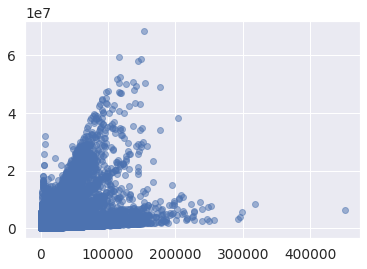

In [24]:
plt.scatter(df_InfusionesyOtros['Fac Kilos'], df_InfusionesyOtros['Fac Impo Bruto'], alpha = 0.5);

En el caso de las variables 'Fac Kilos' y'Fact Impo Bruto', la primer variable es parte del cálculo de la segunda variable, por lo cual es esperable que exista relación directa entre ambas.